<a href="https://colab.research.google.com/github/mahmayer/Mackenzie/blob/main/Aprofundamento_T1_Zipf_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##UNIVERSIDADE PRESBITERIANA MACKENZIE
##PARADIGMAS DE LINGUAGEM DE PROGRAMAÇÃO EM CIÊNCIA DE DADOS


##**Validação da Lei de Zipf - Tarefa de Aprofundamento 1**
###**Introdução**


O livro Dom Casmurro foi uma das maiores obras de Machado de Assis. Apesar de ser um livro antigo, publicado pela primeira vez em 1899, é uma obra literária bastante lida até os dias de hoje, abordando temas sobre a sociedade brasileira e provocando polêmicas em torno do caráter de uma das principais personagens femininas da literatura brasileira, Capitu.

Machado de Assis foi um escritor, considerado por muitos como um dos maiores nomes da literatura brasileira. Escreveu em praticamente todos os gêneros literários: poesia, romance, crônica, conto, folhetim e crítica literária. 

O objtivo desse trabalho é analisar a frequência de ternos de uma obra literária centenária e uma das mais importantes do país.

In [4]:
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


texto = []

for line in urllib.request.urlopen('https://www.gutenberg.org/cache/epub/55752/pg55752.txt'): 
    texto.append(line.decode('utf-8'))

for i in range(len(texto)):
    texto[i] = texto[i].lower()
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    texto[i] = texto[i].replace('\'','')
  
print(texto)

['\ufeffthe project gutenberg ebook of dom casmurro by machado de assis\r', '\r', 'this ebook is for the use of anyone anywhere in the united states and most\r', 'other parts of the world at no cost and with almost no restrictions\r', 'whatsoever  you may copy it give it away or re-use it under the terms of\r', 'the project gutenberg license included with this ebook or online at\r', 'wwwgutenbergorg  if you are not located in the united states youll have\r', 'to check the laws of the country where you are located before using this ebook\r', '\r', 'title: dom casmurro\r', '\r', 'author: machado de assis\r', '\r', 'release date: october 15 2017 [ebook #55752]\r', '\r', 'language: portuguese\r', '\r', '\r', '*** start of this project gutenberg ebook dom casmurro ***\r', '\r', '\r', '\r', '\r', 'produced by laura natal rodriguez & marc dhooghe at free\r', 'literature online soon in an extended versionalso linking\r', 'to free sources for education worldwide  moocs\r', 'educational material

In [5]:
frequencia = {}                             # cria um dicionário vazio

for line in texto:
  line = line.lower()                   # converte para minúsculo
  words = line.split()                  # separa cada palavra

  for word in words:
    if word not in frequencia.keys():         # se palavra não está no dicionário 
      frequencia[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      frequencia[word] =  frequencia[word] + 1    # apenas soma 1 ao valor já existente

print(frequencia)  

{'\ufeffthe': 1, 'project': 83, 'gutenberg': 25, 'ebook': 12, 'of': 123, 'dom': 11, 'casmurro': 10, 'by': 30, 'machado': 4, 'de': 1975, 'assis': 4, 'this': 49, 'is': 23, 'for': 28, 'the': 186, 'use': 11, 'anyone': 5, 'anywhere': 2, 'in': 63, 'united': 15, 'states': 20, 'and': 70, 'most': 5, 'other': 16, 'parts': 2, 'world': 2, 'at': 15, 'no': 350, 'cost': 3, 'with': 48, 'almost': 2, 'restrictions': 2, 'whatsoever': 2, 'you': 72, 'may': 15, 'copy': 12, 'it': 15, 'give': 4, 'away': 2, 'or': 78, 're-use': 2, 'under': 6, 'terms': 21, 'license': 15, 'included': 3, 'online': 6, 'wwwgutenbergorg': 5, 'if': 22, 'are': 24, 'not': 28, 'located': 7, 'youll': 2, 'have': 7, 'to': 84, 'check': 4, 'laws': 10, 'country': 4, 'where': 5, 'before': 4, 'using': 6, 'title:': 1, 'author:': 1, 'release': 1, 'date:': 1, 'october': 1, '15': 1, '2017': 1, '[ebook': 1, '#55752]': 1, 'language:': 1, 'portuguese': 1, '***': 4, 'start': 2, 'produced': 3, 'laura': 2, 'natal': 2, 'rodriguez': 2, '&': 2, 'marc': 2, 'd

In [26]:
df = pd.DataFrame(frequencia.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df.sort_values('count',ascending=False).reset_index(drop=True)
df.head(30)

,word,count
0,que,2635
1,a,2548
2,e,2171
3,de,1975
4,o,1699
5,não,1403
6,um,777
7,é,694
8,os,662
9,do,640


In [27]:
df['log_count'] = np.log(df['count'])
df['log_rank'] = np.log(df.index)
df['log_rank'].replace(-np.Inf,0,inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,word,count,log_count,log_rank
0,que,2635,7.876638,0.000000
1,a,2548,7.843064,0.000000
2,e,2171,7.682943,0.693147
3,de,1975,7.588324,1.098612
4,o,1699,7.437795,1.386294


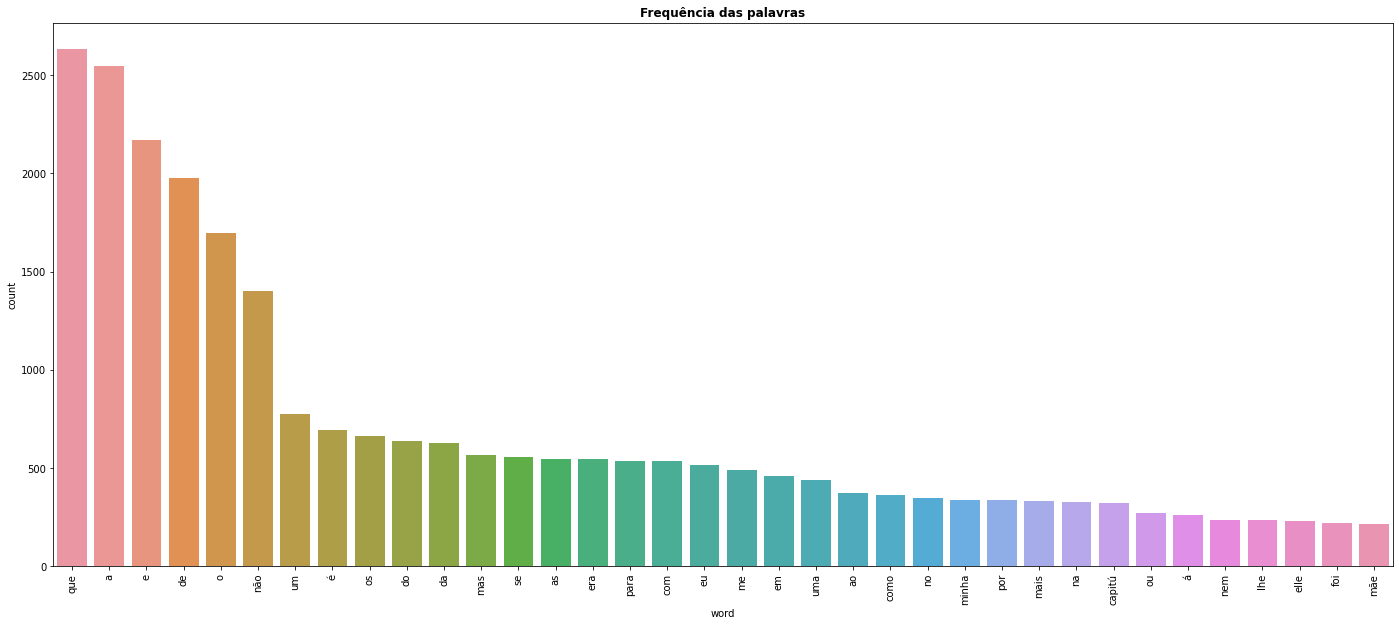

In [25]:
plt.figure(figsize=(24,10))
sns.barplot(x=df[df['count'] > 200].word,y=df[df['count'] > 200]['count'])
plt.title('Frequência das palavras', fontsize=12, weight='bold')
plt.xticks(rotation=90)

plt.show()

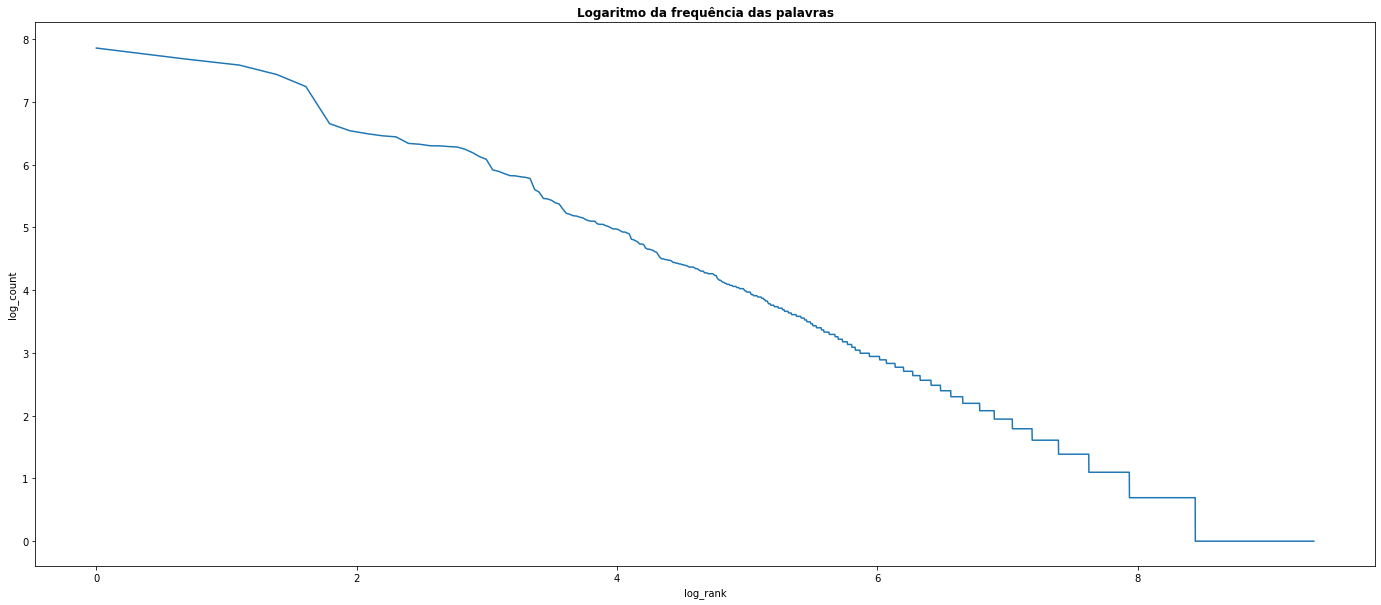

In [24]:
plt.figure(figsize=(24,10))
sns.lineplot(x=df['log_rank'],y=df['log_count'])
plt.title('Logaritmo da frequência das palavras', fontsize=12, weight='bold')

plt.show()

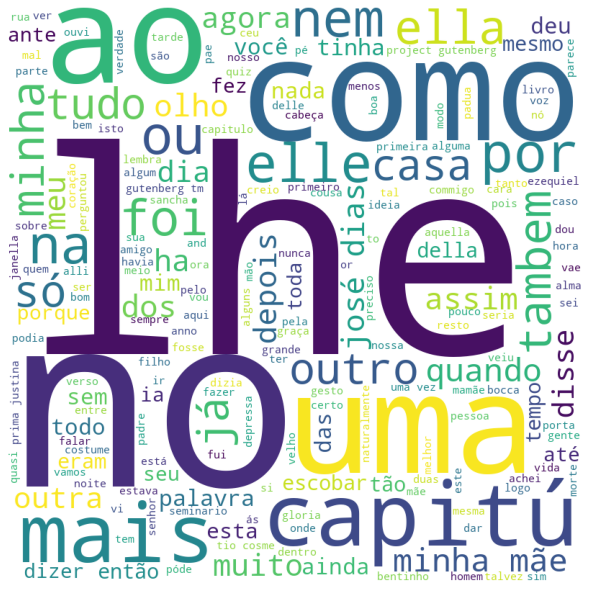

In [12]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(df.word.head(20))

texto_string = ''

for line in texto: 
  texto_string = texto_string + ' ' + line.lower()  

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(texto_string)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

###**Conclusão**

Os termos mais frequentes são artigos e preposições. A primeira palavra que poderia sugerir o tema do texto em análise, é o nome "Capitú", que encontra-se na 29º posição e aparece 324 vezes, como pode ser visto na tabela e no gráfico acima.

Além disso, o segundo gráfico, "Logaritmo da frequência de palavras", se aproxima de uma linha reta, indicando que os dados seguem a lei de Zipf.

Link para verificar o código: 